<h1 style="text-align: center;"> PROJECT I: LA SIERRA RED WINE INVENTORIES  </h1>

---

## Full Name: Henrietta Nhyira Afia Gyekyi
## ID : 10954832
## Department: Materials science and Engineering

---

<h2 style="text-align: center;"> TABLE CONTENT </h2>


--- 

### INTRODUCTION 
### 1. Pre-processing  of the data 
### 2. Statistical inferences of the entire dataset 
### 3. Statistical inferences of individuals columns
### 4. Statistical Correlation and Heatmap  
### CONCLUSION

---

### Introduction
Dataset of all inventories of red wine of "LA SIERRA". The exploratory is as follow:

In [68]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [69]:
# defining an object name df 
data = pd.read_csv('data.csv')

In [70]:
# Primary Dataset
data

ID  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.4             0.700         0.00             1.9   
1        2            7.8             0.880         0.00             2.6   
2        3            7.8             0.760         0.04             2.3   
3        4           11.2             0.280         0.56             1.9   
4        5            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1596  1597            5.9             0.550         0.10             2.2   
1597  1598            6.3             0.510         0.13             2.3   
1598  1599            5.9             0.645         0.12             2.0   
1599  1600            6.0             0.310         0.47             3.6   
1600  1601            7.2             0.390         0.44             2.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700   NaN   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1596      0.062                 39.0                  51.0  0.99512  3.52   
1597      0.076                 29.0                  40.0  0.99574  3.42   
1598      0.075                 32.0                  44.0  0.99547  3.57   
1599      0.067                 18.0                  42.0  0.99549  3.39   
1600      0.066                 22.0                  48.0  0.99494  3.30   

      sulphates  alcohol  quality  
0          0.56      9.4      5.0  
1          0.68      9.8      5.0  
2          0.65      9.8      5.0  
3          0.58      9.8      6.0  
4          0.56      9.4      5.0  
...         ...      ...      ...  
1596       0.76     11.2      6.0  
1597       0.75     11.0      6.0  
1598       0.71     10.2      5.0  
1599       0.66     11.0      6.0  
1600       0.84     11.5      6.0  

[1601 rows x 13 columns]

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1600 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1600 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1598 non-null   float64
 6   free sulfur dioxide   1600 non-null   float64
 7   total sulfur dioxide  1600 non-null   float64
 8   density               1600 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


* The dataset has only float and integer value 
* The dataset has empty cell as well 

## 1.Pre-processing of the data

In [72]:
# checking for any duplicate data 
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1596    False
1597    False
1598    False
1599    False
1600    False
Length: 1601, dtype: bool

* No duplicate were found

In [73]:
# checking for any empty value
data.isnull().any().any()

True

* There are missing value in the dataset

### Drop of all empty spaces in the entire Dataset 
 The purpose of using this method is to avoid duplication of data in each features, also since the number of empty data in each features are not considerable.

In [74]:
# reconstruction of the data set 
data= data.loc[0:1601, ['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide', 'density','pH','sulphates','alcohol','quality']]

In [75]:
# Getting rid of all empty dataset 
data.dropna(inplace= True)

In [76]:
# checking if there is correction
data.isnull().any().any()

False

* None empty data found

In [77]:
# New dataset after pre-processing
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1596            5.9             0.550         0.10             2.2      0.062   
1597            6.3             0.510         0.13             2.3      0.076   
1598            5.9             0.645         0.12             2.0      0.075   
1599            6.0             0.310         0.47             3.6      0.067   
1600            7.2             0.390         0.44             2.6      0.066   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1596                 39.0                  51.0  0.99512  3.52       0.76   
1597                 29.0                  40.0  0.99574  3.42       0.75   
1598                 32.0                  44.0  0.99547  3.57       0.71   
1599                 18.0                  42.0  0.99549  3.39       0.66   
1600                 22.0                  48.0  0.99494  3.30       0.84   

      alcohol  quality  
0         9.4      5.0  
1         9.8      5.0  
3         9.8      6.0  
4         9.4      5.0  
5         9.4      5.0  
...       ...      ...  
1596     11.2      6.0  
1597     11.0      6.0  
1598     10.2      5.0  
1599     11.0      6.0  
1600     11.5      6.0  

[1591 rows x 12 columns]

In [78]:
# Suppression of duplicated value 
data.drop_duplicates(inplace= True)

In [79]:
# checking for duplicated data 
data.duplicated()

0       False
1       False
3       False
5       False
6       False
        ...  
1593    False
1594    False
1596    False
1598    False
1599    False
Length: 1351, dtype: bool

In [80]:
# out putting the 60 first row 
data.head(60)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00            1.90      0.076   
1             7.8             0.880         0.00            2.60      0.098   
3            11.2             0.280         0.56            1.90      0.075   
5             7.4             0.660         0.00            1.80      0.075   
6             7.9             0.600         0.06            1.60      0.069   
7             7.3             0.650         0.00            1.20      0.065   
8             7.8             0.580         0.02            2.00      0.073   
9             7.5             0.500         0.36            6.10      0.071   
12            5.6             0.615         0.00            1.60      0.089   
13            7.8             0.610         0.29            1.60      0.114   
14            8.9             0.620         0.18            3.80      0.176   
15            8.9             0.620         0.19            3.90      0.170   
16            8.5             0.280         0.56            1.80      0.092   
17            8.1             0.560         0.28            1.70      0.368   
18            7.4             0.590         0.08            4.40      0.086   
19            7.9             0.320         0.51            1.80      0.341   
20            8.9             0.220         0.48            1.80      0.077   
21            7.6             0.390         0.31            2.30      0.082   
22            7.9             0.430         0.21            1.60      0.106   
24            6.9             0.400         0.14            2.40      0.085   
25            6.3             0.390         0.16            1.40      0.080   
26            7.6             0.410         0.24            1.80      0.080   
28            7.1             0.710         0.00            1.90      0.080   
29            7.8             0.645         0.00            2.00      0.082   
30            6.7             0.675         0.07            2.40      0.089   
31            6.9             0.685         0.00            2.50      0.105   
32            8.3             0.655         0.12            2.30      0.083   
33            6.9             0.605         0.12           10.70      0.073   
34            5.2             0.320         0.25            1.80      0.103   
35            7.8             0.645         0.00            5.50      0.086   
36            7.8             0.600         0.14            2.40      0.086   
37            8.1             0.380         0.28            2.10      0.066   
38            5.7             1.130         0.09            1.50      0.172   
39            7.3             0.450         0.36            5.90      0.074   
41            8.8             0.610         0.30            2.80      0.088   
42            7.5             0.490         0.20            2.60      0.332   
43            8.1             0.660         0.22            2.20      0.069   
44            6.8             0.670         0.02            1.80      0.050   
45            4.6             0.520         0.15            2.10      0.054   
46            7.7             0.935         0.43            2.20      0.114   
47            8.7             0.290         0.52            1.60      0.113   
48            6.4             0.400         0.23            1.60      0.066   
49            5.6             0.310         0.37            1.40      0.074   
50            8.8             0.660         0.26            1.70      0.074   
51            6.6             0.520         0.04            2.20      0.069   
52            6.6             0.500         0.04            2.10      0.068   
53            8.6             0.380         0.36            3.00      0.081   
54            7.6             0.510         0.15            2.80      0.110   
55            7.7             0.620         0.04            3.80      0.084   
56           10.2             0.420         0.57      

In [81]:
# Information about the entire dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1351 non-null   float64
 1   volatile acidity      1351 non-null   float64
 2   citric acid           1351 non-null   float64
 3   residual sugar        1351 non-null   float64
 4   chlorides             1351 non-null   float64
 5   free sulfur dioxide   1351 non-null   float64
 6   total sulfur dioxide  1351 non-null   float64
 7   density               1351 non-null   float64
 8   pH                    1351 non-null   float64
 9   sulphates             1351 non-null   float64
 10  alcohol               1351 non-null   float64
 11  quality               1351 non-null   float64
dtypes: float64(12)
memory usage: 137.2 KB


In [82]:
data.shape

(1351, 12)

* After pre processing, 1351 was entered with data type float  

### 2- Statistical inferences of the entire dataset 

In [83]:
# Generale descriptive of the entire data set
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1351.000000       1351.000000  1351.000000     1351.000000   
mean        8.316284          0.529456     0.272879        2.525685   
std         1.738927          0.183015     0.195612        1.355780   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.100000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1351.000000          1351.000000           1351.000000  1351.000000   
mean      0.088167            15.855662             46.761288     0.996713   
std       0.049512            10.413199             33.432478     0.001873   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997830   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1351.000000  1351.000000  1351.000000  1351.000000  
mean      3.309933     0.658956    10.434431     5.624722  
std       0.155294     0.171032     1.083298     0.824052  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

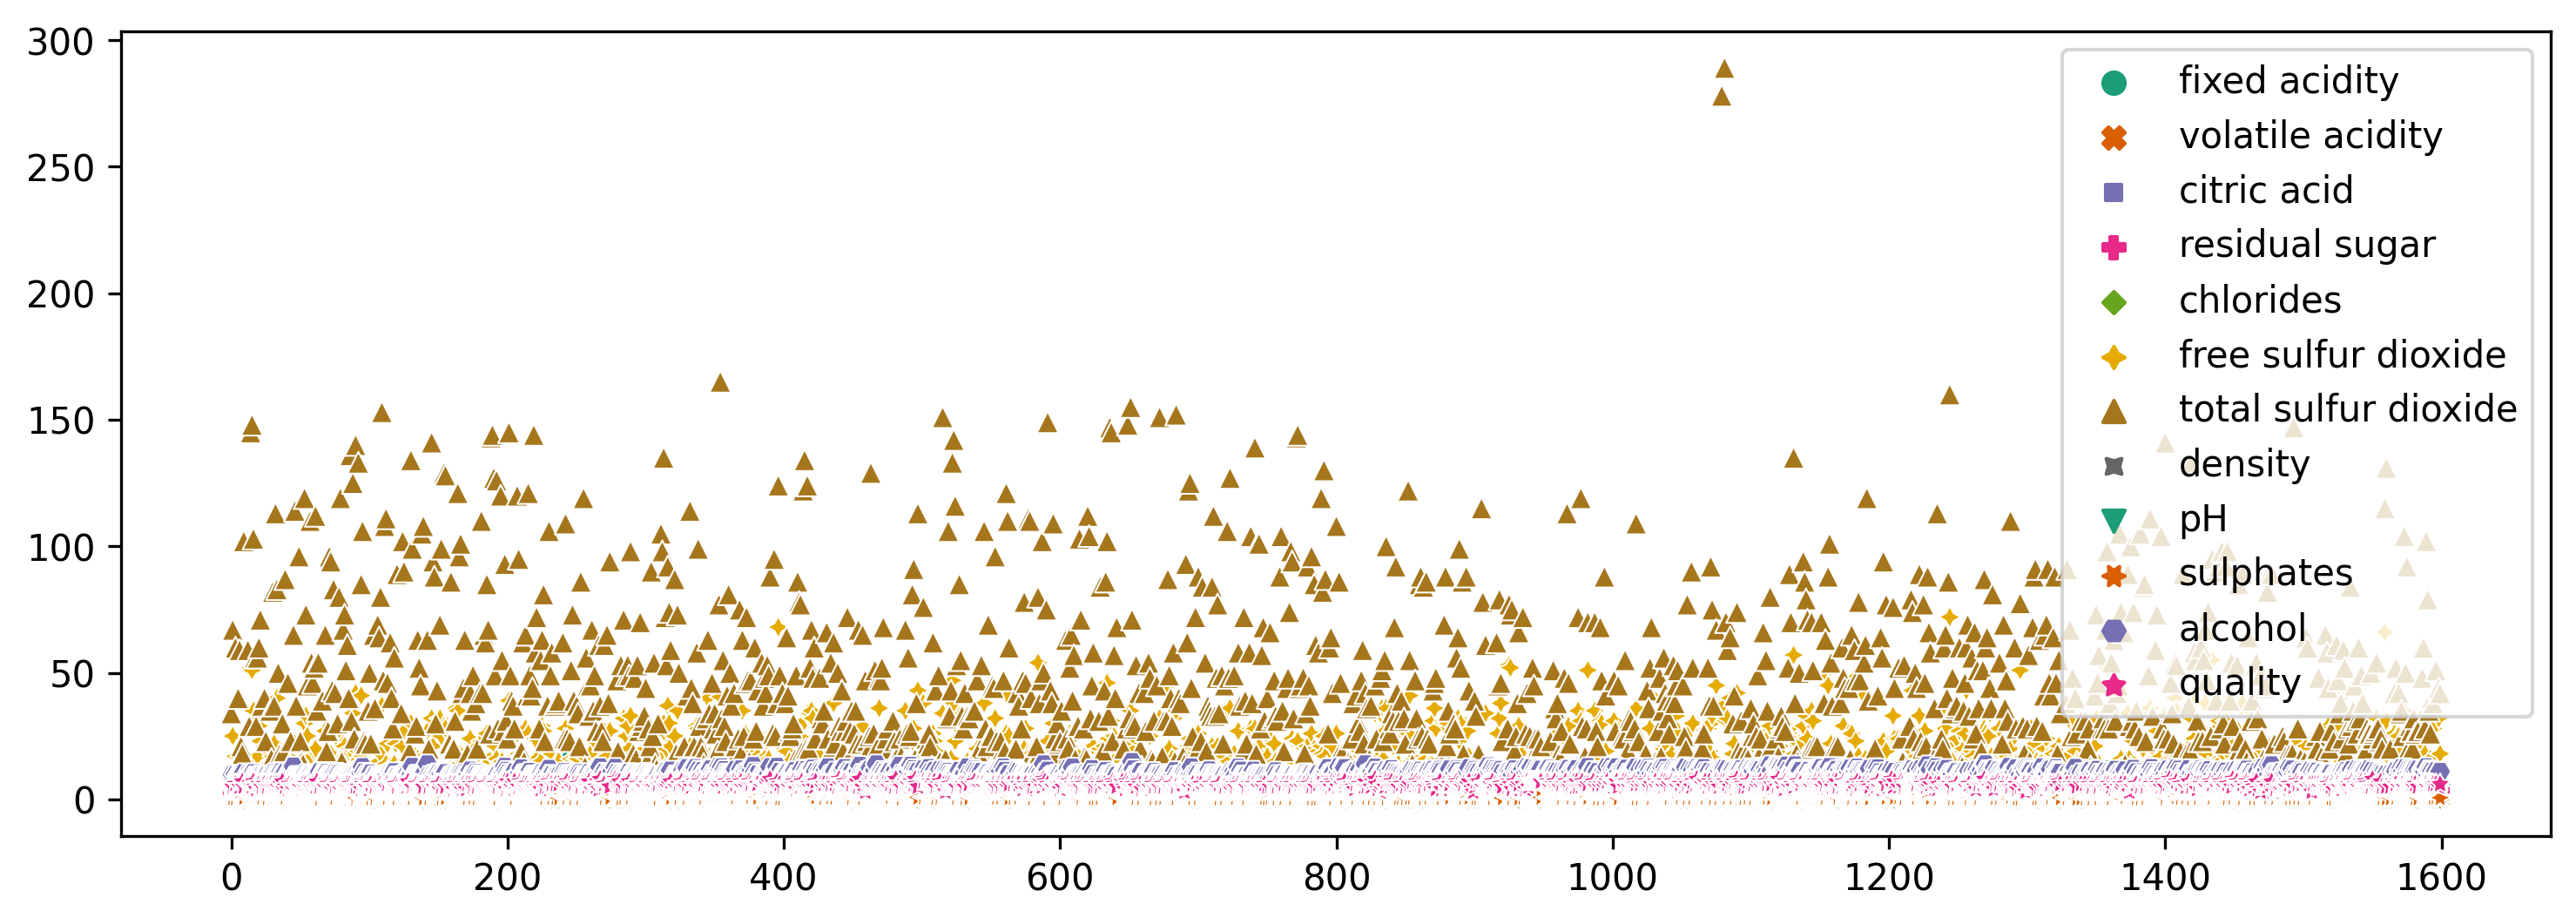

In [84]:
plt.figure(figsize=(12,4), dpi= 300)
p= sb.scatterplot(data= data, palette= 'Dark2')
plt.show()

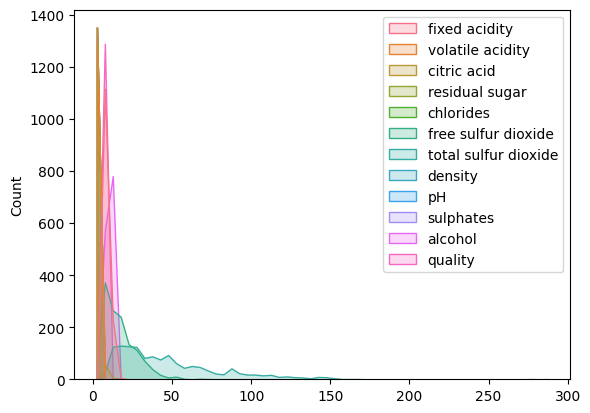

In [85]:
D= sb.histplot(data= data, bins =10 , binwidth=5, element= 'poly')
plt.show()

- The histogram plot of the entire dataset shows that volatile acidity, citric acid , residual sugar, pH and fixed acidity have the highest count that is between [0:1400].
- Sulfate, alcohol and quality have the average count that is between [0:800]
- And free sulfur dioxide, total sulfur dioxide, chlorides, density have the lowest count that is between [0:400]

### 3- Statistical inferences of individual columns 

#### Descriptive of each columns 

In [86]:
data['fixed acidity'].describe()

count    1351.000000
mean        8.316284
std         1.738927
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [100]:
data['volatile acidity'].describe()

count    1351.000000
mean        0.529456
std         0.183015
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [101]:
data['citric acid'].describe()

count    1351.000000
mean        0.272879
std         0.195612
min         0.000000
25%         0.100000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64

In [102]:
data['residual sugar'].describe()

count    1351.000000
mean        2.525685
std         1.355780
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [103]:
data.chlorides.describe()

count    1351.000000
mean        0.088167
std         0.049512
min         0.012000
25%         0.070000
50%         0.079000
75%         0.091000
max         0.611000
Name: chlorides, dtype: float64

In [104]:
data['free sulfur dioxide'].describe()

count    1351.000000
mean       15.855662
std        10.413199
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [105]:
data.density.describe()

count    1351.000000
mean        0.996713
std         0.001873
min         0.990070
25%         0.995600
50%         0.996700
75%         0.997830
max         1.003690
Name: density, dtype: float64

In [106]:
data.pH.describe()

count    1351.000000
mean        3.309933
std         0.155294
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [107]:
data.sulphates.describe()

count    1351.000000
mean        0.658956
std         0.171032
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [108]:
data.alcohol.describe()

count    1351.000000
mean       10.434431
std         1.083298
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [109]:
data.quality.describe()

count    1351.000000
mean        5.624722
std         0.824052
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#### Pie plot of each columns 

* A subplot2grid to combine a pie plot of each feature is as follow

Text(0.5, 1.0, 'quality')

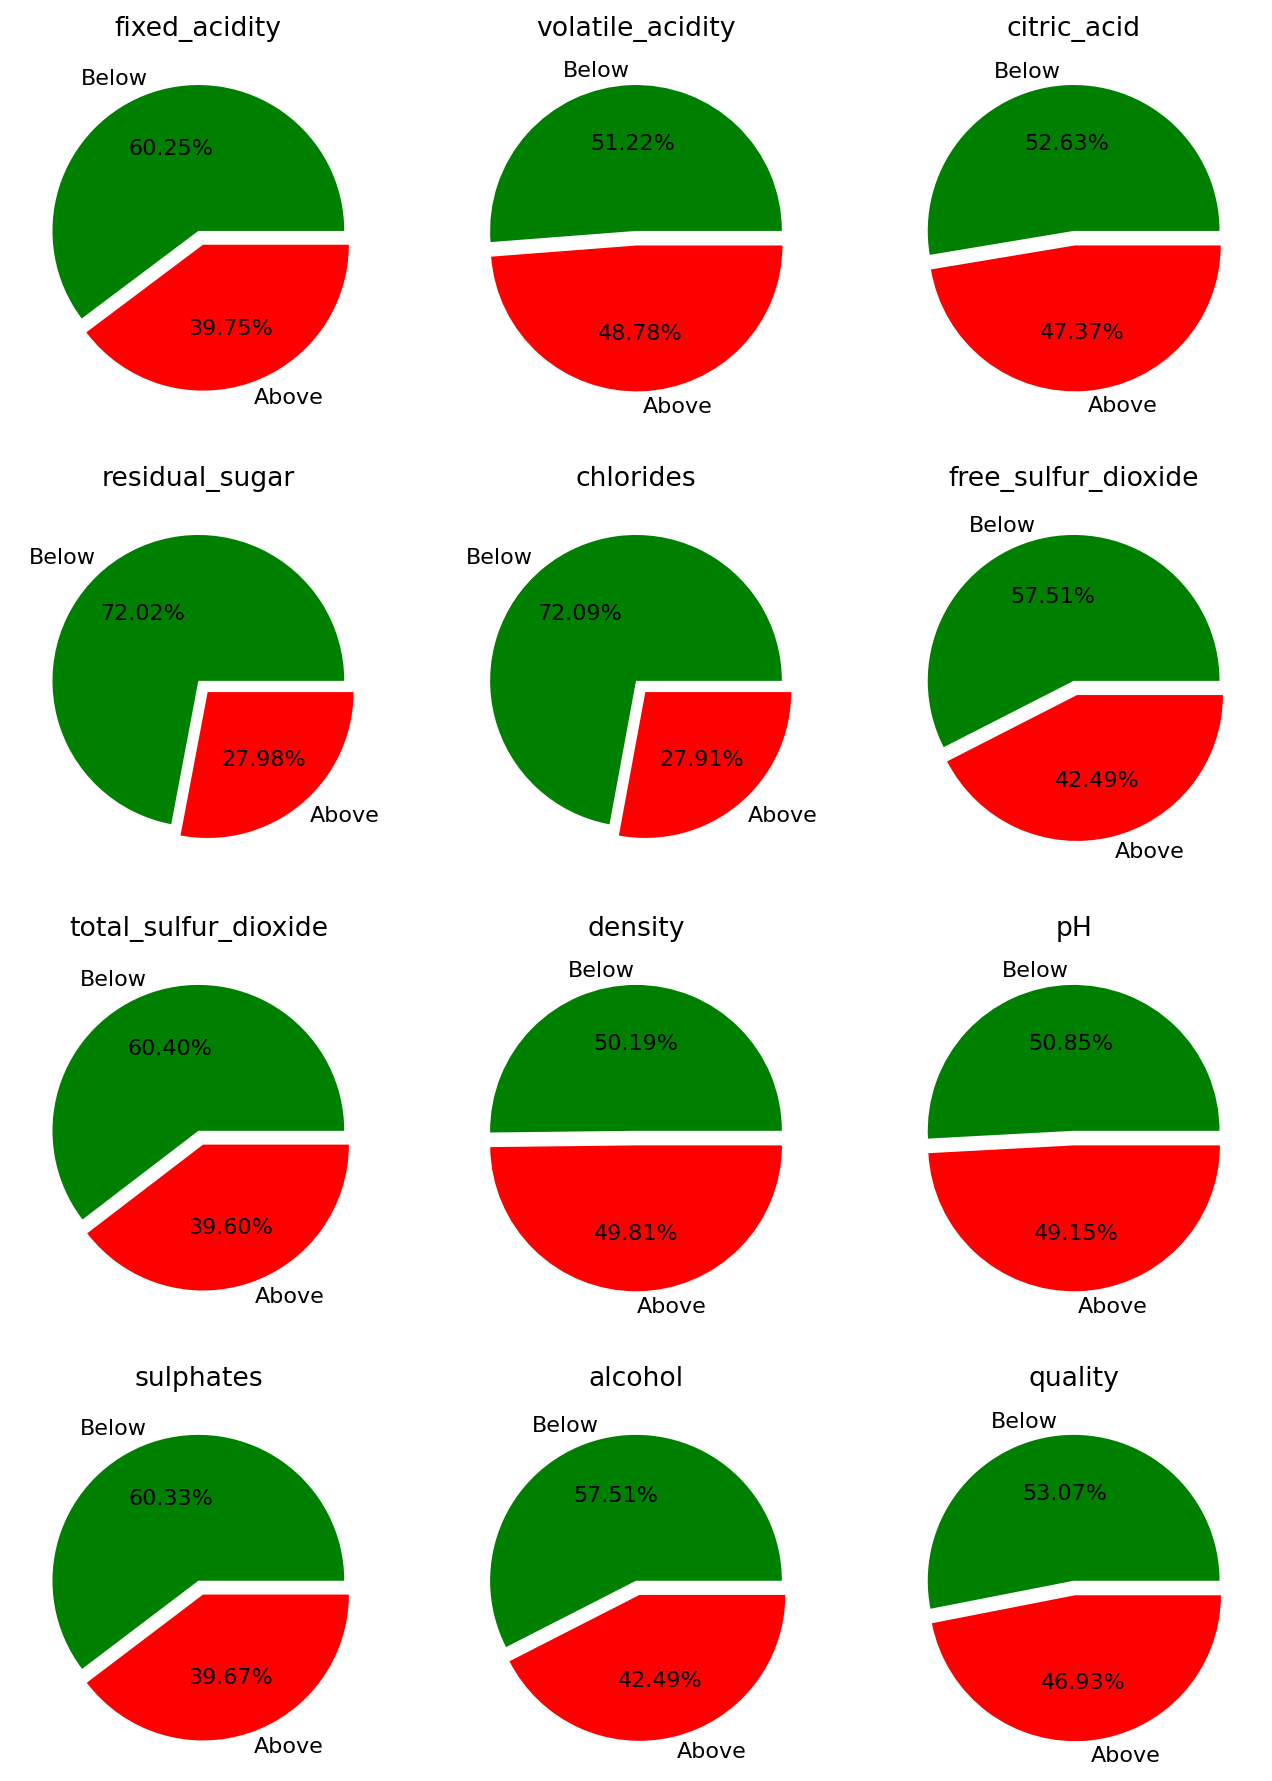

In [110]:
fig = plt.figure(figsize=(10,14), dpi=160)
explode = [0,0.1]
lb= ['Below', 'Above']
#4 rows 3 columns
# giving all
x= data['fixed acidity'] < data['fixed acidity'].mean()
#first row, first column
ax1 = plt.subplot2grid((4,3),(0,0))
plt.pie(x.value_counts(), colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('fixed_acidity')

y= data['volatile acidity'] < data['volatile acidity'].mean()
#first row sec column
ax2 = plt.subplot2grid((4,3),(0, 1))
plt.pie(y.value_counts(),colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('volatile_acidity')

z = data['citric acid'] < data['citric acid'].mean()
#first row thrird column
ax3 = plt.subplot2grid((4,3),(0, 2))
plt.pie(z.value_counts(),colors=("g","r"),labels= lb, autopct = '%.2f%%', explode= explode)
plt.title('citric_acid')

a= data['residual sugar'] < data['residual sugar'].mean()
#second row, first column
ax1 = plt.subplot2grid((4,3),(1,0))
plt.pie(a.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('residual_sugar')

c=data.chlorides<data.chlorides.mean()
#second row thrird column
ax1 = plt.subplot2grid((4,3), (1, 1))
plt.pie(c.value_counts() ,colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('chlorides')

d= data['free sulfur dioxide']<data['free sulfur dioxide'].mean()
#third row, first column
ax1 = plt.subplot2grid((4,3),(1,2))
plt.pie(d.value_counts() ,colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('free_sulfur_dioxide')

e= data['total sulfur dioxide']< data['total sulfur dioxide'].mean()
#third row sec column
ax1 = plt.subplot2grid((4,3),(2, 0))
plt.pie(e.value_counts(),colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('total_sulfur_dioxide')

f= data.density < data.density.mean()
#third row thrird column
ax1 = plt.subplot2grid((4,3),(2, 1))
plt.pie(f.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('density')

g= data.pH<data.pH.mean()
#fourth row, first column
ax1 = plt.subplot2grid((4,3),(2,2))
plt.pie(g.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('pH')

h=data.sulphates<data.sulphates.mean()
#fourth row sec column
ax1 = plt.subplot2grid((4,3),(3,0))
plt.pie(h.value_counts(), colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('sulphates')

i=data.alcohol<data.alcohol.mean()
#fourth row thrird column
ax1 = plt.subplot2grid((4,3),(3,1))
plt.pie(i.value_counts(),colors=("g","r"), autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('alcohol')

j=data.quality<data.quality.mean()
#fifth row, first column
ax1 = plt.subplot2grid((4,3),(3,2))
plt.pie(j.value_counts(),colors=("g","r"),autopct = '%.2f%%',explode= explode,labels= lb)
plt.title('quality')

* Residual sugar has the highest number of element concentration below the its mean 
* Chlorides has the lower percentage of element concentration above the its mean 
* Densityr has the lowers number of element concentration below the its mean 
* Sulphates has the lower percentage of element concentration above the its mean

In [111]:
# determination of number of unique value in each columns 
for col in data.columns.values:
    print('the unique values of {} = {}'.format(col,data[col].nunique()))

the unique values of fixed acidity = 96
the unique values of volatile acidity = 143
the unique values of citric acid = 80
the unique values of residual sugar = 91
the unique values of chlorides = 153
the unique values of free sulfur dioxide = 60
the unique values of total sulfur dioxide = 144
the unique values of density = 434
the unique values of pH = 89
the unique values of sulphates = 96
the unique values of alcohol = 65
the unique values of quality = 6


* Density has the maximum unique value of : 434
* Quality has the minimun unique value of : 6
* And since quality has the minimum unique value the catplot will be possible  

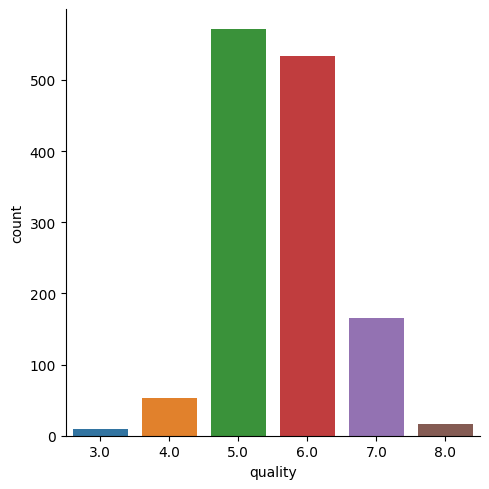

In [112]:
sb.catplot(x= 'quality', data= data, kind= 'count')

* The intervale [4.5 : 5.5] are mostly repeating in each sample which is represent as green in the above plot  
* Most of the sample will have a quality between this intervale

#### Box plot of the dataset 

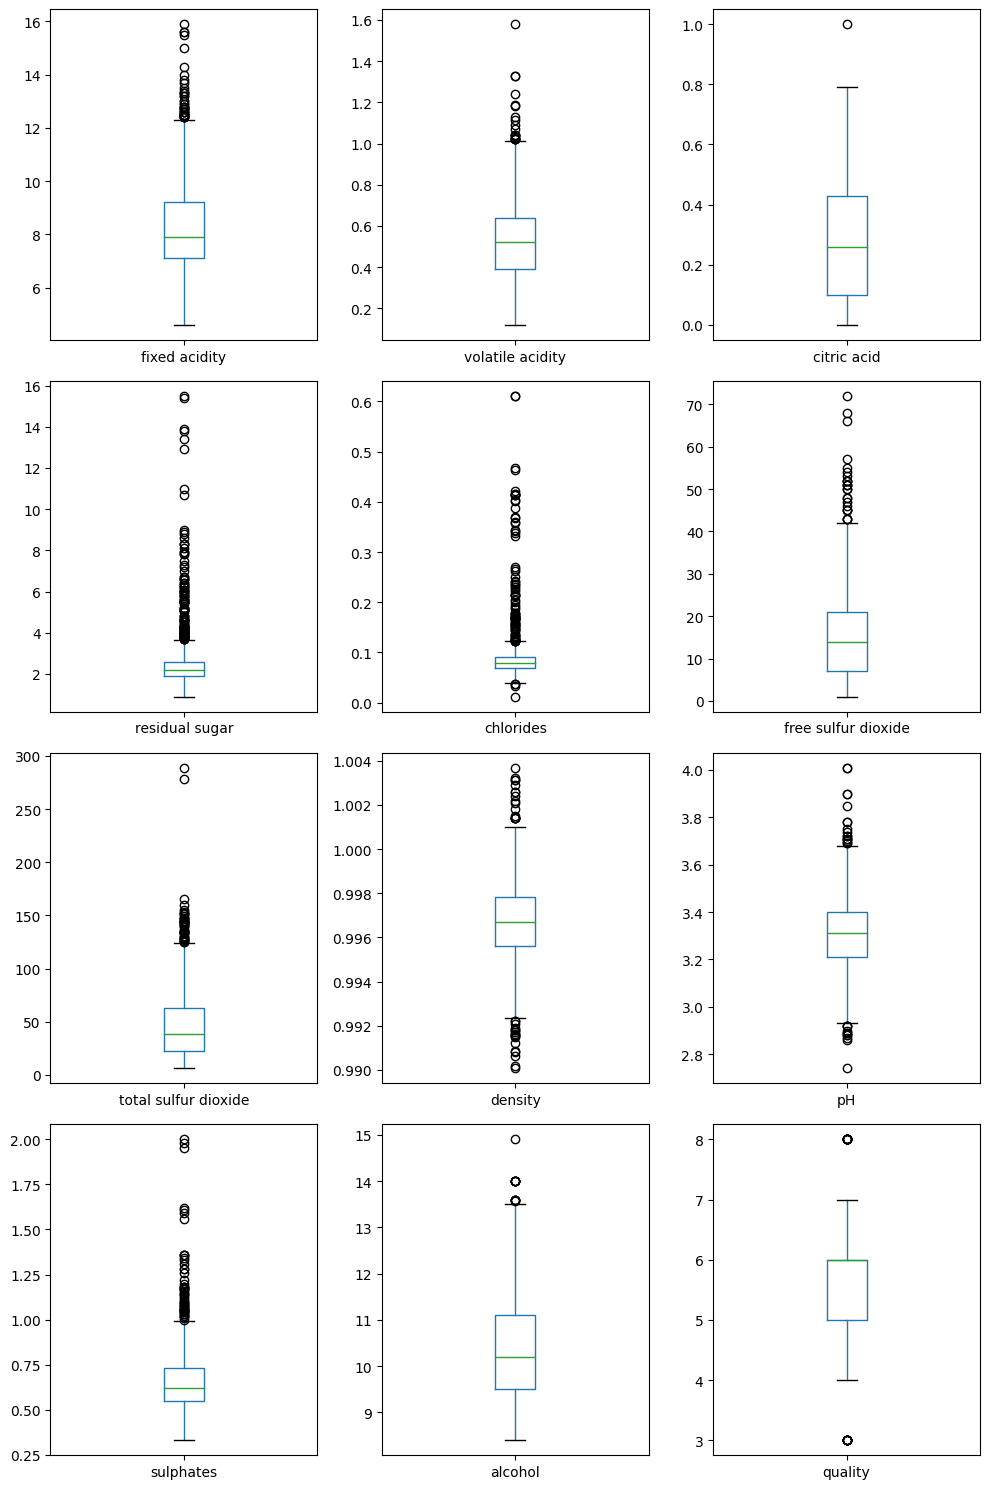

In [113]:
plt.figure(figsize=(10,15))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()

* The points outside the 1.5-IQR range or more above the third quartile are considered outliers.
* All other features have outliers besides alcohol.

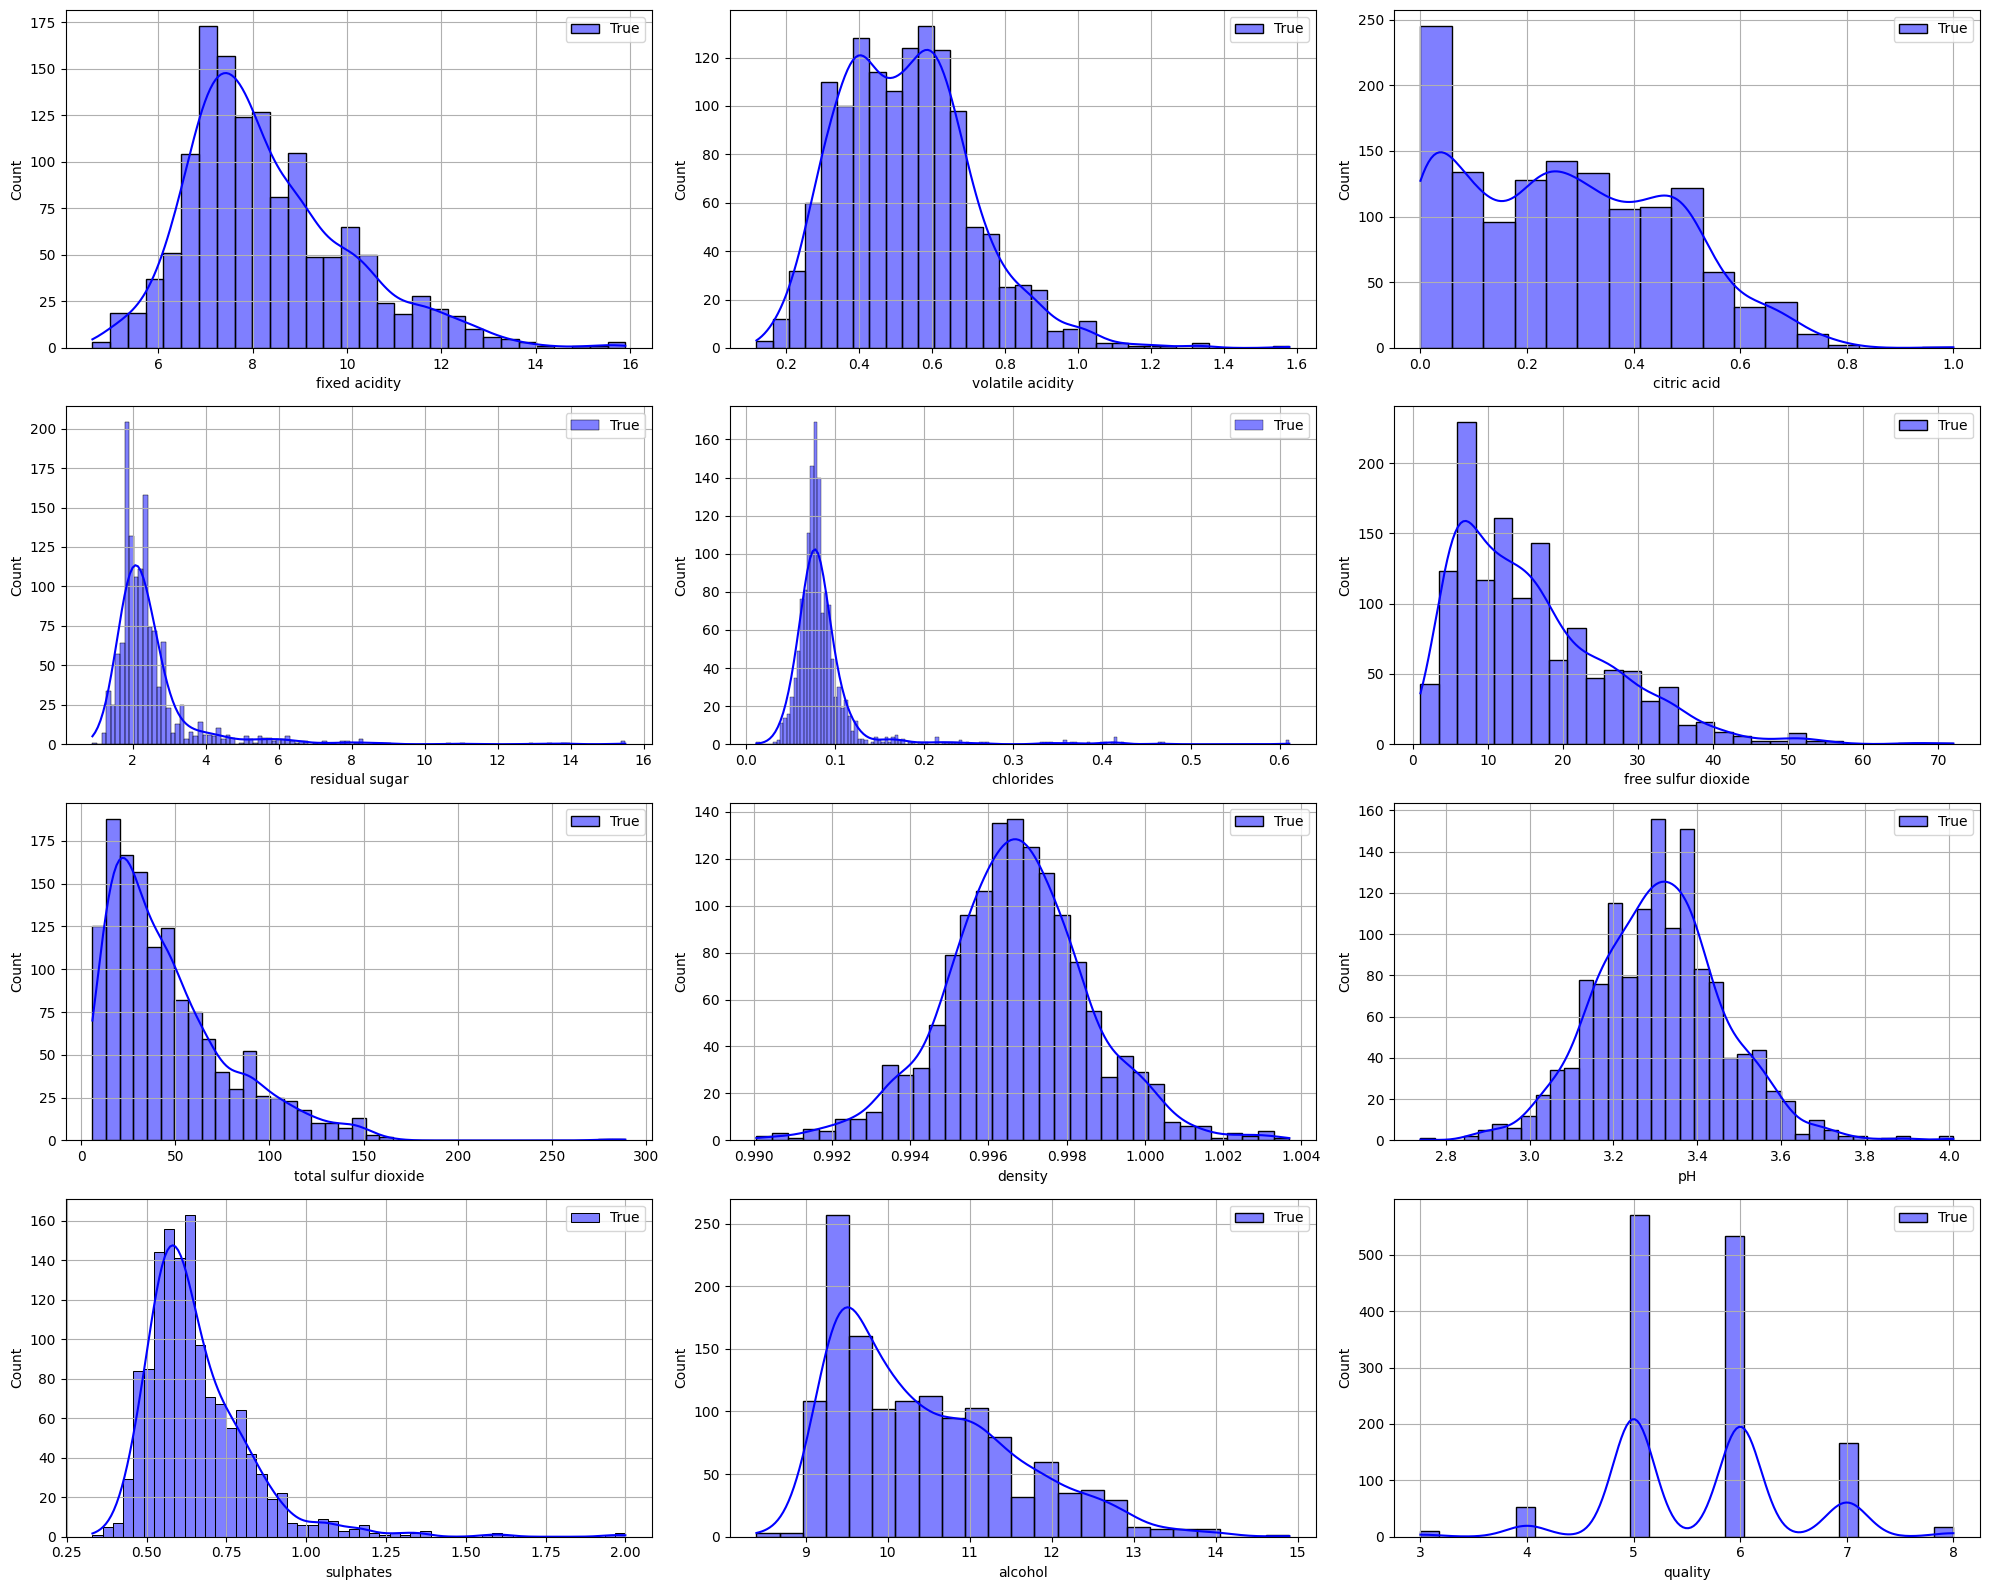

In [114]:
plt.figure(figsize=(20,16))
for i, col in enumerate(list(data.columns.values)):
    plt.subplot(4,3,i+1)
    sb.histplot(data[col], color='b', kde=True, label= True)
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

* The pH characteristic has a roughly normal distribution and centered.
* Any independent trait that is still present is curved to the left.
* Only Quality has a distinct bar plot

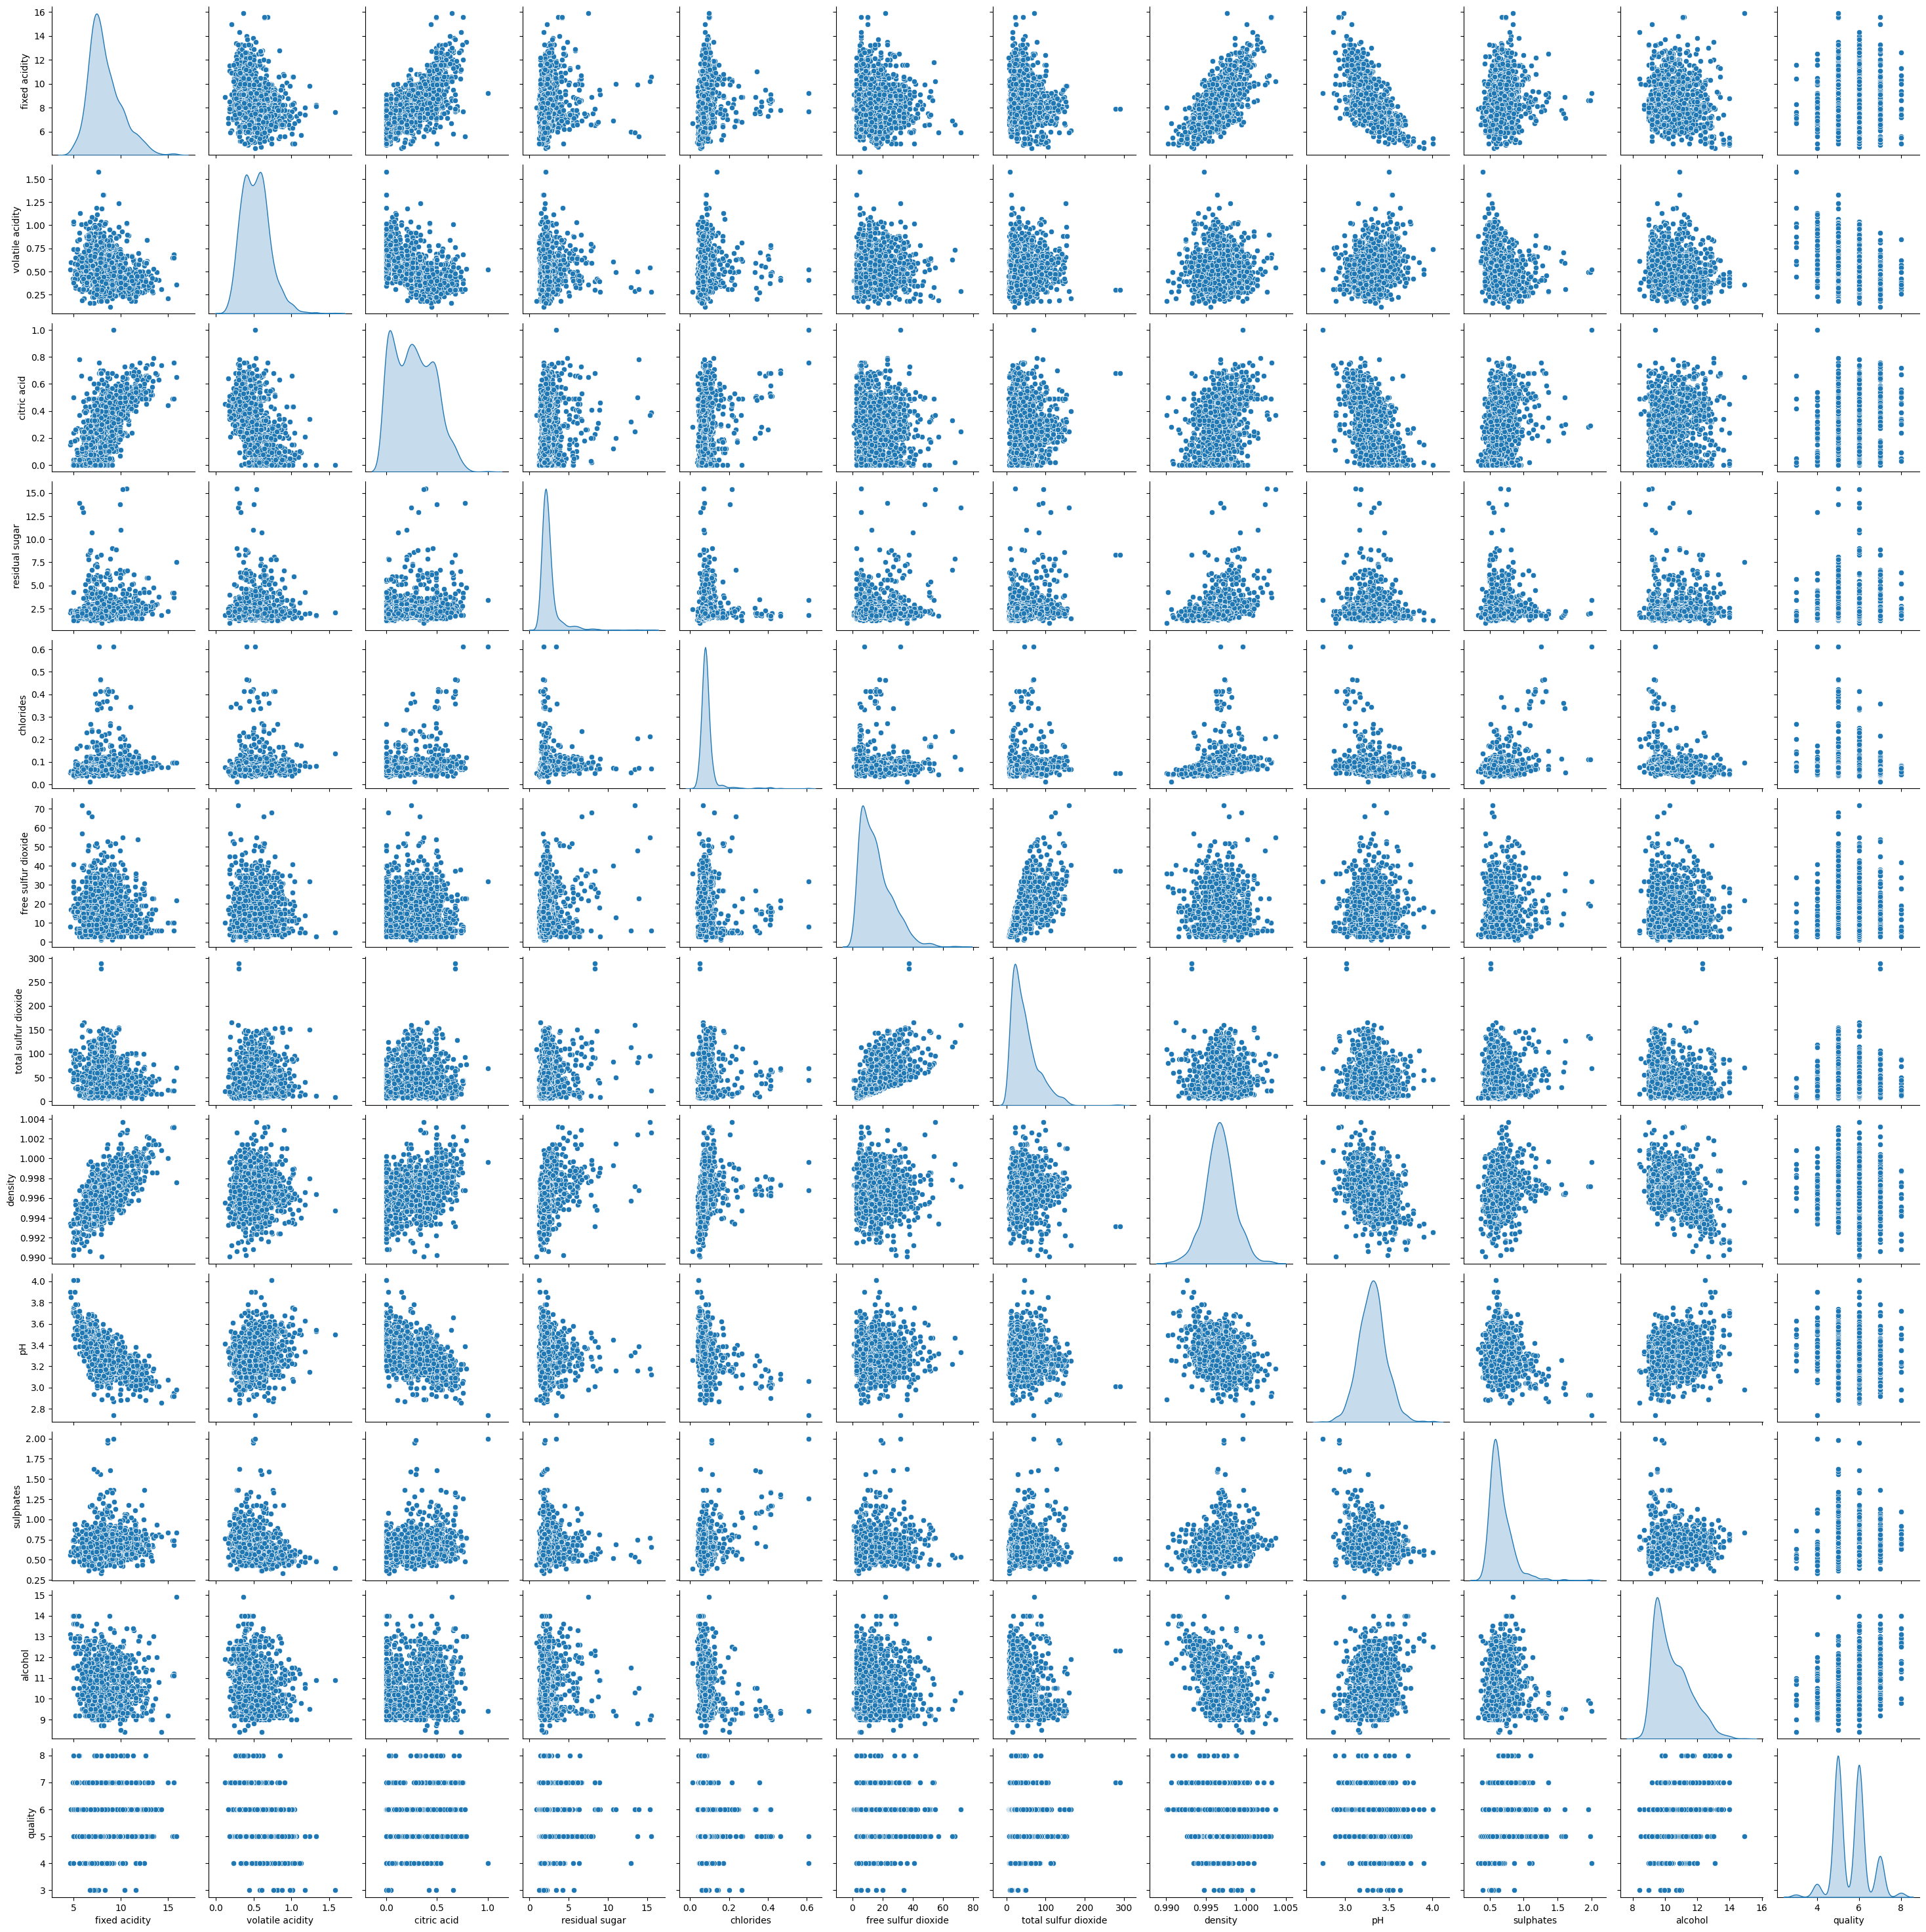

In [115]:
sb.pairplot(data=data, kind='scatter', diag_kind='kde')

* The visualization pairwise show the relationships between variables in this dataset using the Seaborn Pairplot.
* By condensing the data into a single figure, gives a pleasant visual representation of the data and aids in understanding our data.

### 4. Statistical Correlation and Heatmap

In [116]:
data_correlation= data.corr()

In [117]:
data_correlation

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255936     0.668852   
volatile acidity          -0.255936          1.000000    -0.549886   
citric acid                0.668852         -0.549886     1.000000   
residual sugar             0.110373         -0.003139     0.143836   
chlorides                  0.085618          0.054651     0.211165   
free sulfur dioxide       -0.137433         -0.025509    -0.044820   
total sulfur dioxide      -0.102230          0.069213     0.050401   
density                    0.669680          0.023757     0.358692   
pH                        -0.687725          0.246097    -0.551692   
sulphates                  0.190346         -0.257314     0.325260   
alcohol                   -0.062098         -0.198820     0.103757   
quality                    0.118405         -0.393794     0.224986   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.110373   0.085618            -0.137433   
volatile acidity           -0.003139   0.054651            -0.025509   
citric acid                 0.143836   0.211165            -0.044820   
residual sugar              1.000000   0.026517             0.161572   
chlorides                   0.026517   1.000000             0.001721   
free sulfur dioxide         0.161572   0.001721             1.000000   
total sulfur dioxide        0.201583   0.046051             0.667864   
density                     0.324426   0.193354            -0.015194   
pH                         -0.083866  -0.271528             0.053324   
sulphates                  -0.012547   0.395182             0.054556   
alcohol                     0.062288  -0.223953            -0.082930   
quality                     0.013175  -0.130757            -0.048443   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.102230  0.669680 -0.687725   0.190346   
volatile acidity                  0.069213  0.023757  0.246097  -0.257314   
citric acid                       0.050401  0.358692 -0.551692   0.325260   
residual sugar                    0.201583  0.324426 -0.083866  -0.012547   
chlorides                         0.046051  0.193354 -0.271528   0.395182   
free sulfur dioxide               0.667864 -0.015194  0.053324   0.054556   
total sulfur dioxide              1.000000  0.079112 -0.080563   0.036377   
density                           0.079112  1.000000 -0.355579   0.146294   
pH                               -0.080563 -0.355579  1.000000  -0.215081   
sulphates                         0.036377  0.146294 -0.215081   1.000000   
alcohol                          -0.217791 -0.505858  0.212368   0.089786   
quality                          -0.175533 -0.184774 -0.054838   0.247393   

                       alcohol   quality  
fixed acidity        -0.062098  0.118405  
volatile acidity     -0.198820 -0.393794  
citric acid           0.103757  0.224986  
residual sugar        0.062288  0.013175  
chlorides            -0.223953 -0.130757  
free sulfur dioxide  -0.082930 -0.048443  
total sulfur dioxide -0.217791 -0.175533  
density              -0.505858 -0.184774  
pH                    0.212368 -0.054838  
sulphates             0.089786  0.247393  
alcohol               1.000000  0.479715  
quality               0.479715  1.000000

<Axes: >

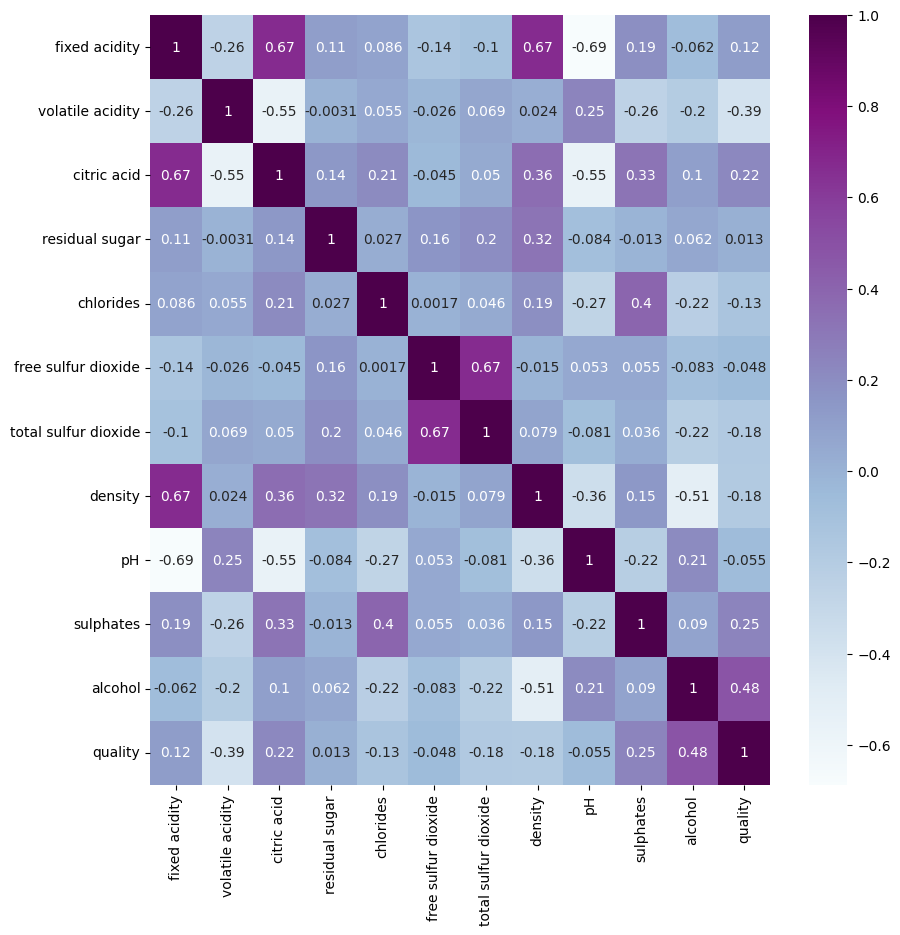

In [118]:
plt.figure(figsize=(10,10))
sb.heatmap(data_correlation, annot=True, cmap='BuPu', cbar= True )

### Conclusion 

- A substantial negative correlation exists between density and alcohol, yet a large positive correlation exists between density with residual sugar.
- The correlation between density and fixed acidity is positive.
- Citric acid and fixed acidity correlate positively; citric acid and volatile acidity correlate negatively; and free sulphur dioxide and total sulphur dioxide correlate favorably.